# [Texas hold 'em](https://en.wikipedia.org/wiki/Texas_hold_%27em)
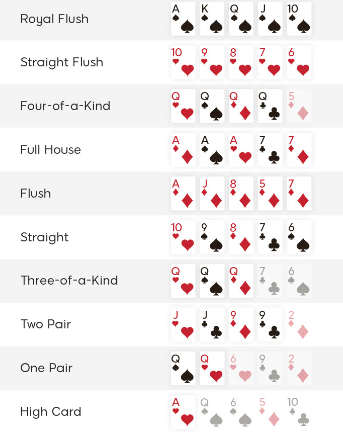

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import combinations

# Contents
## Part 1 - Functions
## Part 2 - Design a Strategy
## Part 3 - Probabilities of Hands
## Part 4 - Winning Rate Table for Two Starting Hands (Pre-flop)

## @@@ All cards
**Generate a list containing all the cards (suits and numbers)。**

**Suits:**
- Heart: h
- Dimond: d
- Clubs:c
- Spades:s


In [2]:
all_cards = []
for i in range(1,14):
    for j in ['h','d','c','s']:
        all_cards = all_cards + [str(i)+j]

# Part 1 - Functions

In [3]:
def generated_n_random_card(card_pool,remove_cards,n):
    """
    Randomly select n card from card_pool - remove_cards
    Args:
        card_pool: a list contains available cards 
        remove_cards: a list containes cards that shoule be removed from card_pool (cannot be selected)
        n: number of cards to be selected
    Returns:
        a list n random selected card from "card_pool - remove_cards"
    """
    available_pool = [x for x in card_pool if x not in remove_cards]
    get_card = random.sample(available_pool,n)
    return(get_card)


generated_n_random_card(all_cards,[],5)

['11c', '8c', '2c', '12s', '6c']

In [4]:
def check_input(cards,is_print):
    """
    Check if the input is valid
    Args:
        cards: a list contains 5 cards 
        is_print: a binary variable that indicate whether print out details in the checking
    Returns:
        1 - valid; 0 - invalid
    
    """
    if is_print:
        print(cards)
        
    correct = 0
    
    if len(cards) != 5:
        if is_print:
            print('the input should contain 5 cards')
        return correct
    
    if len(set(cards)) < len(cards):
        if is_print:
            print("invalid input (duplicated cards)")
        return correct
    else:
        suits   = [i[-1] for i in cards]
        numbers = [int(i[:-1]) for i in cards]
        check_suit   = [int(suits[i] not in ['h','s','d','c']) for i in range(5)]
        check_number = [int(numbers[i]<1 or numbers[i]>13) for i in range(5)]
        if np.max(check_number)==1:
            if is_print:
                print('invalid input (check number)')
        elif np.max(check_suit)==1:
            if is_print:
                print('invalid input (check suit)')
        else:
            correct = 1
            if is_print:
                print('valid input')
    return correct

check_input(['1h','1h','3s','5s','12c'],True)
check_input(['1h','4e','3s','5s','12c'],True)


['1h', '1h', '3s', '5s', '12c']
invalid input (duplicated cards)
['1h', '4e', '3s', '5s', '12c']
invalid input (check suit)


0

In [5]:
def adj_numbers(numbers):
    """
    Helper function for check_straight()

    Args:
        numbers: a list include 5 numbers (1-13)
    Returns:
        Sorted numbers(descending). In addition if 1 appears, and the five numbers are not [1,2,3,4,5], replace 1 by 14.
    """
    numbers_sorted = sorted(numbers,reverse=True)
    ##### Replace 1 with 14 if it is not a 1-5 straight
    if numbers_sorted !=[5,4,3,2,1]:
        numbers_sorted = [14 if i==1 else i for i in (numbers_sorted)]
    numbers_sorted = sorted(numbers_sorted,reverse=True)
    return(numbers_sorted)

aaa = list(np.random.choice(np.arange(1, 14), size=5, replace=True))
print(aaa)
print(adj_numbers(aaa))

[5, 12, 7, 13, 8]
[13, 12, 8, 7, 5]


In [6]:
def check_flush(suits):
    """
    Args:
        suits: a list contains five suits (possible values: 'h','d','c','s')
    Returns:
        1: flush; 0 : not flush
    """
    if len(set(suits))==1:
        return 1
    else:
        return 0


suit1 = ['d','d','d','d','d']
suit2 = ['d','d','s','d','c']
print(check_flush(suit1))
print(check_flush(suit2))

1
0


[**Counter( )**](https://docs.python.org/3/library/collections.html#collections.Counter) returns a dictionary stores elements and their counts. 

**most_common(n)** return a list of the n most common elements and their counts from the most common to the least. For five card, the number of most common elements is 5 at most. The element in this list is ordered by counts, and the name of the element (number in this case). 

The count of the most common element - most_common_obj[0][1]. The count of the second most common element - most_common_obj[1][1].

Logic
  - 1. If the count of the the most common elememt is 4, , the five cards are **aaaab** - the shape is **[1,0,0,1]**.
  - 2. If the count of the the most common elememt is 3,
    - a. if the count of the the second most common elememt is 1, the five cards are **aaabc** - the shape is **[0,1,0,2]**.
    - b. if the count of the the second most common elememt is 2, the five cards are **aaabb** - the shape is **[0,1,1,0]**.
  - 3. If the count of the the most common elememt is 2, 
    - a. if the count of the the second most common elememt is 1, the five cards are **aabcd** - the shape is **[0,0,1,3]**.
    - b. if the count of the the second most common elememt is 2, the five cards are **aabbc** - the shape is **[0,0,2,1]**.
  - 4. If the count of the the most common elememt is 1, the five cards are **abcde** - the shape is **[0,0,0,5]**.

In [7]:
def shape_of_numbers(numbers):
    """
    Args:
        suits: a list contains five numbers (possible values: 1-14)
    Returns:
        a list contains four elements [r1,r2,r3,r4]. 
        r1 represents the number of "xxxx" in the five numbers - 0,1
        r2 represents the number of "xxx"  in the five numbers - 0,1
        r3 represents the number of "xx"   in the five numbers - 0,1,2
        r4 represents the number of "x"    in the five numbers - 0,1,2,3,4,5
    """    
    shape = [0]*4    
    
    most_common_obj = Counter(numbers).most_common(5)
    
    mc_1 = most_common_obj[0]
    if mc_1[1] == 1:
        shape = [0,0,0,5]
    if mc_1[1] == 4:
        shape = [1,0,0,1]
    if mc_1[1] == 3:
        mc_2 = most_common_obj[1]
        if mc_2[1] == 2:
            shape=[0,1,1,0]
        if mc_2[1] ==1:
            shape=[0,1,0,2]
    if mc_1[1] == 2:
        mc_2 = most_common_obj[1]
        if mc_2[1] == 2:
            shape=[0,0,2,1]
        if mc_2[1] ==1:
            shape=[0,0,1,3]
    return(shape)
    

aaa = list(np.random.choice(np.arange(1, 14), size=5, replace=True))
print(aaa)
print(shape_of_numbers(aaa))    
    
    

[4, 4, 9, 3, 13]
[0, 0, 1, 3]


In [8]:
def check_straight(numbers):
    """
    Args:
        numbers: a list contains five numbers (possible values: 1-14)
    Returns:
        1: straight; 0: not straight
    """    
    numbers = adj_numbers(numbers)
    #print(numbers)
    shape = shape_of_numbers(numbers)
    #print(shape)
    if numbers == [5,4,3,2,1]:
        return 1
    elif shape[3]<5:
        return 0
    else:
        if numbers[0] - numbers[4] == 4:
            return 1
        else:
            return 0
        
a1 = [2,5,4,3,1]
a2 = [10,11,13,12,1]
a3 = [12,5,4,3,1]
a4 = [2,7,4,3,1]
a5 = [2,2,4,3,1]



print(a1,check_straight(a1))
print(a2,check_straight(a2))
print(a3,check_straight(a3))
print(a4,check_straight(a4))
print(a5,check_straight(a5))
        

[2, 5, 4, 3, 1] 1
[10, 11, 13, 12, 1] 1
[12, 5, 4, 3, 1] 0
[2, 7, 4, 3, 1] 0
[2, 2, 4, 3, 1] 0


**In this get_score(cards) function, there are six level scores. The final score is defined by**
**score1+score2/100+score3/10000+score4/1000000+score5/100000000+score6/10000000000.**

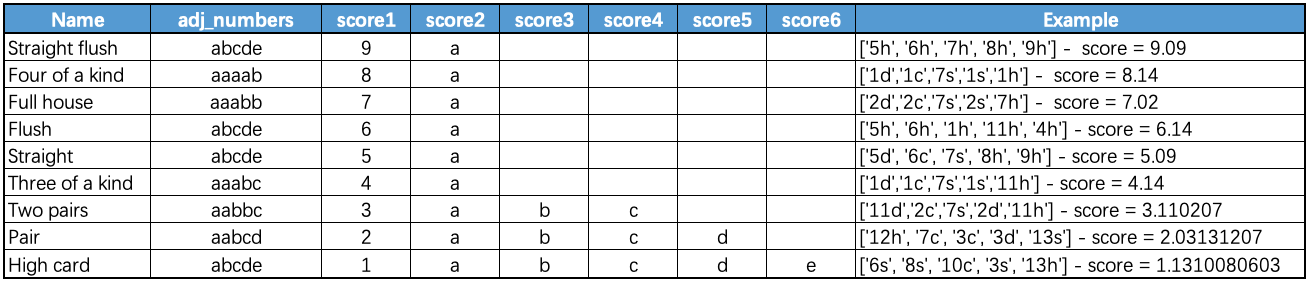


In [9]:
def get_score(cards):
    """
    Args:
        cards: a list contains five cards (suit and number)
    Returns:
        a score, higher score means higher hand values
    """    
    suits   = [i[-1] for i in cards]
    numbers = [int(i[:-1]) for i in cards]
    numbers = adj_numbers(numbers)
    shape = shape_of_numbers(numbers)
    

    is_straight = check_straight(numbers)
    is_flush = check_flush(suits)
    shape = shape_of_numbers(numbers)
    score_1 = int(0)
    score_2 = int(0)
    score_3 = int(0)
    score_4 = int(0)
    score_5 = int(0)
    score_6 = int(0)
    
    if is_flush==1:
        if is_straight==1:
            hand  = 'Straight Flush'
            score_1 = 9
            score_2 = numbers[0]
        else:
            hand  = 'Flush'
            score_1 = 6
            score_2 = numbers[0]
    else:
        #### xxxx appears
        if shape[0] == 1: 
            hand = 'Four of a Kind'
            score_1 = 8
            score_2 = numbers[0]
        #### xxx appears
        elif shape[1] == 1:
            #### xx appears
            if shape[2] ==1:
                hand = 'Full House'
                score_1 = 7
                x = Counter(numbers).most_common(2)
                score_2 = x[0][0]
            #### no xx appears
            else:
                hand = 'Three of a Kind'
                score_1 = 4
                x = Counter(numbers).most_common(3)
                score_2 = x[0][0]
        #### xxyy appears   
        elif shape[2] == 2:
            hand = 'Two Pairs'
            score_1 = 3
            x = Counter(numbers).most_common(3)
            score_2 = x[0][0]
            score_3 = x[1][0]
            score_4 = x[2][0]
        #### xxabc
        elif shape[2] == 1:
            hand = 'Pair'
            score_1 = 2
            x = Counter(numbers).most_common(4)
            score_2 = x[0][0]
            score_3 = x[1][0]
            score_4 = x[2][0]
            score_5 = x[3][0]
        else:
            if is_straight==1: 
                hand = 'Straight'
                score_1 = 5
                score_2 = numbers[0]
            else:
                hand = 'High card'
                score_1 = 1
                score_2 = numbers[0]
                score_3 = numbers[1]
                score_4 = numbers[2]
                score_5 = numbers[3]
                score_6 = numbers[4]
    tran_score = round(score_1*1+score_2*0.01+score_3*0.0001+score_4*0.000001+score_5*0.00000001+score_6*0.0000000001,12)
    
    return(hand,tran_score,score_1,score_2,score_3,score_4,score_5,score_6)
    

cards = generated_n_random_card(all_cards,[],5)
print(cards)
get_score(cards)

['11d', '2c', '13s', '4h', '1d']


('High card', 1.1413110402, 1, 14, 13, 11, 4, 2)

In [10]:
def compare_cards(cards_1,cards_2):
    """
    Args:
        cards_1: a list contains five cards
        cards_2: a list contains five cards
    Returns:
        score_1: score of cards_1
        score_2: score of cards_2
        results: "Win" cards_1 wins, "Lose" cards_1 loses, "Tie": tie
    """    
    ##### card1 - win:1; lose=0, tie=0.5
    result = np.nan
    
    score_1 = get_score(cards_1)
    score_2 = get_score(cards_2)

    diff = score_1[1] - score_2[1]

    if diff>0:
        result = 'Win'
    elif diff==0:
        result = 'Tie'
    else:
        result = 'Lose'
    return (score_1,score_2,result)  


**Generate five random cards for player 1 and player 2, compare their hand values**

**It is possible that the two players have identical card(s), which is impossible in real game**

In [11]:
a = generated_n_random_card(all_cards,[],5)
b = generated_n_random_card(all_cards,[],5)
check_input(a,is_print=0)
check_input(b,is_print=0)
print(a)
print(b)
compare_cards(a,b)

['9d', '6h', '11s', '6d', '7c']
['1d', '3d', '2c', '4h', '10s']


(('Pair', 2.06110907, 2, 6, 11, 9, 7, 0),
 ('High card', 1.1410040302, 1, 14, 10, 4, 3, 2),
 'Win')

**Generate five random cards for player 1 and player 2, compare their hand values**

**Generate player 1's cards first. When generating the cards for player 2, remove player 1's five cards**

In [12]:
a = generated_n_random_card(all_cards,[],5)
b = generated_n_random_card(all_cards,a,5)
check_input(a,is_print=0)
check_input(b,is_print=0)
print(a)
print(b)
compare_cards(a,b)

['3s', '7h', '12h', '4h', '4d']
['11c', '4c', '13s', '5h', '13d']


(('Pair', 2.04120703, 2, 4, 12, 7, 3, 0),
 ('Pair', 2.13110504, 2, 13, 11, 5, 4, 0),
 'Lose')

In [13]:
def find_best_hand(seven_cards):
    """
    Args:
        seven_cards: a list contains seven cards
    Returns:
        best_score: the score of the best hand from all five-card combinations of the seven cards
        best_hand: the best hand from all five-card combinations of the seven cards
    """    
    combinations_list = list(combinations(seven_cards, 5))
    best_score = 0
    best_hand  = []
    for i in combinations_list:
        score_now = get_score(i)[1]
        if score_now>best_score:
            best_score = score_now
            best_hand = i
    return(best_score,best_hand)

In [14]:
a = generated_n_random_card(all_cards,[],7)
print(a)
find_best_hand(a)

['8c', '2h', '1d', '10h', '11c', '12c', '3d']


(1.1412111008, ('8c', '1d', '10h', '11c', '12c'))

In [15]:
def sim_probs(A_cards,river_faceup,n_sim,verbose=0):
    """
    Return the probabilities of win, lose and tie for player 1, with given information. 
    Based on simulation.
    Args:
        A_cards: player A's cards
        river_faceup: face_up river cards
        n_sim: number of simulations
        verbose: whether print more information 
    Returns:
        best_score: the score of the best hand from all five-card combinations of the seven cards
        best_hand: the best hand from all five-card combinations of the seven cards
    """    
    n_faceup = len(river_faceup)
    results = [np.nan]*n_sim
    for i in range(n_sim):
        river_facedown = generated_n_random_card(all_cards,A_cards+river_faceup,5-n_faceup)
        B_starting     = generated_n_random_card(all_cards,A_cards+river_faceup+river_facedown,2)
        if verbose ==1:
            print(river)
            print(B_starting)
        A_best_score,A_best_hand = find_best_hand(A_cards+river_faceup+river_facedown)
        B_best_score,B_best_hand = find_best_hand(B_starting+river_faceup+river_facedown)
        results[i] = compare_cards(A_best_hand,B_best_hand)[2]
        if verbose ==1:
            print(A_best_score)
            print(A_best_hand)
            print(B_best_score)
            print(B_best_hand)
            print(results[i])
    win_count  =  results.count('Win')
    lose_count =  results.count('Lose')
    tie_count  =  results.count('Tie')
    rate = {'win':win_count/n_sim,'lose':lose_count/n_sim,'tie':tie_count/n_sim}
    return(rate)

####  Example: starting hands
- with starting hands
- no face-up river cards

In [16]:
A_starting   = generated_n_random_card(all_cards,[],2)
n_faceup     = 0
river_faceup = generated_n_random_card(all_cards,A_starting,n_faceup)

print(A_starting)
sim_probs(A_starting,river_faceup,200)


['5d', '5h']


{'win': 0.58, 'lose': 0.415, 'tie': 0.005}

####  Example: showdown
- with starting hands
- all five face-up river cards

In [17]:
A_starting   = generated_n_random_card(all_cards,[],2)
n_faceup     = 5
river_faceup = generated_n_random_card(all_cards,A_starting,n_faceup)

print(A_starting)
print(river_faceup)
sim_probs(A_starting,river_faceup,200)

['13s', '3s']
['13h', '10c', '5s', '1h', '9c']


{'win': 0.735, 'lose': 0.215, 'tie': 0.05}

# Part 2 - Design a Strategy
### Consider a simplied game
(1) No betting. This means the players do not use chips or bets. Therefore they do not need to consider the expected values of different decisions. Also this means betting strategies (such as raising, re-raising, bluffing, etc.) are not considered.  

(2) Only consider winning rate. If the winning rate is greater than a threshold, continue; if not, fold. 

(3) No pre-flop folding. The players will not fold before they see the first three river cards. 

(4) The order of action is not considered. The player acts last has the advantage of watching other players in the hand act before making hit/her decision. This advantage is not considered - both players make their decisions simultaneously. 

(5) Two player game

**The codes below simulate a game. Calculates the winning rates for player A as the game progresses with the continuous unveiling of the river cards.**

In [18]:
A_starting   = generated_n_random_card(all_cards,[],2)
B_starting   = generated_n_random_card(all_cards,A_starting,2)
river        = generated_n_random_card(all_cards,A_starting+B_starting,5)
A_best_score,A_best_hand = find_best_hand(A_starting+river)
B_best_score,B_best_hand = find_best_hand(B_starting+river)
actual_result = compare_cards(A_best_hand,B_best_hand)[2]

print('Start')
print('Player A starting hand',A_starting)
print('Player B starting hand',B_starting)
print('River cards',river)
print('Actual Result - Player A:',actual_result)


print()
print('Winning Rates')
river_faceup = river[0:3]
print('3 face-up river cards: ',river_faceup)
print('Player A rates: ',sim_probs(A_starting,river_faceup,200))

river_faceup = river[0:4]
print('4 face-up river cards: ',river_faceup)
print('Player A rates: ',sim_probs(A_starting,river_faceup,200))

river_faceup = river[0:5]
print('5 face-up river cards: ',river_faceup)
print('Player A rates: ',sim_probs(A_starting,river_faceup,200))

Start
Player A starting hand ['1s', '13d']
Player B starting hand ['8h', '8s']
River cards ['11s', '12c', '5h', '12h', '5c']
Actual Result - Player A: Lose

Winning Rates
3 face-up river cards:  ['11s', '12c', '5h']
Player A rates:  {'win': 0.6, 'lose': 0.39, 'tie': 0.01}
4 face-up river cards:  ['11s', '12c', '5h', '12h']
Player A rates:  {'win': 0.535, 'lose': 0.415, 'tie': 0.05}
5 face-up river cards:  ['11s', '12c', '5h', '12h', '5c']
Player A rates:  {'win': 0.6, 'lose': 0.3, 'tie': 0.1}


In [19]:
def strategy(mycard,rivercard,threshold,verbose=0):
    """
    Return a decision, based on available information(my cards, face-up river cards) 
    and a pre-specified threshold for winning rate.
    Args:
        mycard: player A's cards
        rivercard: face_up river cards
        threshold: if the prob(win or tie)<=threshold, fold; otherwise, continue to play.
        verbose: whether print more information 
    Returns:
        0: continue to play; 1: fold now. 
    """    
    fold      = 0
    n_sim_now = 200
    probs     = sim_probs(mycard,rivercard,n_sim_now)
    if verbose==1:
        print(probs)
    prob_WT = probs['win'] + probs['tie'] 
    if prob_WT <= threshold:
        fold = 1
    return(fold)
    
def simlation_strategy(threshold,verbose=0):
    """
    Simulate one game (with generated hands and river cards) using the strategy above, given a threshold
    """    
    A_starting   = generated_n_random_card(all_cards,[],2)
    B_starting   = generated_n_random_card(all_cards,A_starting,2)
    river        = generated_n_random_card(all_cards,A_starting+B_starting,5)
    A_best_score,A_best_hand = find_best_hand(A_starting+river)
    B_best_score,B_best_hand = find_best_hand(B_starting+river)
    actual_result = compare_cards(A_best_hand,B_best_hand)[2]
    if verbose==1:
        print('Player A starting hand:',A_starting)
        print('Player B starting hand:',B_starting)
        print('River card:',river)
        print('Actual result if Player A does not fold:',actual_result)
    
    if strategy(A_starting,river[0:3],threshold,verbose=0)==1:
        decision = 'fold'
    elif strategy(A_starting,river[0:4],threshold,verbose=0)==1:
        decision = 'fold'
    elif strategy(A_starting,river[0:5],threshold,verbose=0)==1:
        decision = 'fold'
    else:
        decision = 'play'
    
    return actual_result,decision

### Consider a strategy - fold if Prob(win or tie) <=0.5 (i.e., threshold = 0.5)

In [20]:
a = simlation_strategy(0.5,verbose=1)
print("Player A's decision based on the stragegy:",a[1] )

Player A starting hand: ['7s', '9s']
Player B starting hand: ['7d', '5d']
River card: ['10d', '5s', '2h', '4c', '13h']
Actual result if Player A does not fold: Lose
Player A's decision based on the stragegy: fold


### In the simulation below, play 10 games. A decision is a "good_decision" if 
- **actual = win/tie, and decision = fold**, or
- **actual = lose, and decision = play**

In [21]:
summary        = pd.DataFrame({'sim':[],'actual':[],'decision':[],'good_decision':[]})
n_sim          = 10
summary['sim'] = range(1,n_sim+1)
threshold      = 0.5
for i in range(0,n_sim):
    sim_now = simlation_strategy(threshold)
    summary.iloc[i,1] = sim_now[0]
    summary.iloc[i,2] = sim_now[1]

a = (summary['actual']=='Lose') & (summary['decision']=='fold')|(summary['actual']!='Lose') \
& (summary['decision']=='play')

summary['good_decision']       = 0
summary.loc[a,'good_decision'] = 1
summary

,sim,actual,decision,good_decision
0,1,Lose,fold,1
1,2,Win,play,1
2,3,Win,fold,0
3,4,Win,play,1
4,5,Lose,fold,1
5,6,Win,fold,0
6,7,Tie,fold,0
7,8,Win,fold,0
8,9,Win,fold,0
9,10,Lose,fold,1


### In the simulation below, play 100 games. Calculate the "good_decision" rate. 

In [22]:
summary        = pd.DataFrame({'sim':[],'actual':[],'decision':[],'good_decision':[]})
n_sim          = 100
summary['sim'] = range(1,n_sim+1)
threshold      = 0.5
for i in tqdm(range(0,n_sim)):
    sim_now = simlation_strategy(threshold)
    summary.iloc[i,1] = sim_now[0]
    summary.iloc[i,2] = sim_now[1]

a = (summary['actual']=='Lose') & (summary['decision']=='fold')|(summary['actual']!='Lose') \
& (summary['decision']=='play')

summary['good_decision']       = 0
summary.loc[a,'good_decision'] = 1
summary['good_decision'].mean()

100%|█████████████████████████████████████████| 100/100 [00:30<00:00,  3.29it/s]


0.67

### Try different thresholds

In [23]:
threshold_compare = pd.DataFrame(columns=['threshold','n_good_decision','good_decision_rate',
                                          'n_fold','n_good_fold','good_fold_rate',
                                          'n_play','n_good_play','good_play_rate'])
n_sim             = 100
threshold_list    = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i, th_value in enumerate(threshold_list):
    summary = pd.DataFrame({'sim':[],'actual':[],'decision':[]})
    summary['sim'] = range(1,n_sim+1)
    for s in tqdm(range(0,n_sim)):
        sim_now = simlation_strategy(th_value)
        summary.loc[s,'actual'] = sim_now[0]
        summary.loc[s,'decision'] = sim_now[1]
    fold_index = summary['decision']=='fold'
    play_index = summary['decision']=='play'

    fold_df = summary.copy().loc[fold_index,:]
    play_df = summary.copy().loc[play_index,:]

    good_fold_index = (fold_df['actual'] == 'Lose')
    good_play_index = (play_df['actual'] != 'Lose')
    fold_df.loc[:,'good_fold'] = 0
    fold_df.loc[good_fold_index,:] = 1
    play_df.loc[:,'good_play'] = 0
    play_df.loc[good_play_index,:] = 1 
    threshold_compare.loc[i,'threshold']       = th_value
    threshold_compare.loc[i,'n_good_decision'] = fold_df['good_fold'].sum()+play_df['good_play'].sum()
    threshold_compare.loc[i,'good_decision_rate'] = threshold_compare.loc[i,'n_good_decision']/n_sim
    threshold_compare.loc[i,'n_fold'] = len(fold_df)
    threshold_compare.loc[i,'n_good_fold'] = fold_df['good_fold'].sum()
    threshold_compare.loc[i,'good_fold_rate'] = \
                    threshold_compare.loc[i,'n_good_fold']/threshold_compare.loc[i,'n_fold'] 
    threshold_compare.loc[i,'n_play'] = len(play_df)
    threshold_compare.loc[i,'n_good_play'] = play_df['good_play'].sum()
    threshold_compare.loc[i,'good_play_rate'] = \
                    threshold_compare.loc[i,'n_good_play']/threshold_compare.loc[i,'n_play'] 


threshold_compare

100%|█████████████████████████████████████████| 100/100 [00:18<00:00,  5.55it/s]


,threshold,n_good_decision,good_decision_rate,n_fold,n_good_fold,good_fold_rate,n_play,n_good_play,good_play_rate
0,0.1,69,0.69,13,12,0.923077,87,57,0.655172
1,0.2,69,0.69,19,14,0.736842,81,55,0.679012
2,0.3,70,0.7,39,28,0.717949,61,42,0.688525
3,0.4,75,0.75,46,34,0.73913,54,41,0.759259
4,0.5,71,0.71,65,42,0.646154,35,29,0.828571
5,0.6,58,0.58,79,39,0.493671,21,19,0.904762
6,0.7,66,0.66,84,51,0.607143,16,15,0.9375
7,0.8,61,0.61,97,58,0.597938,3,3,1.0
8,0.9,58,0.58,96,54,0.5625,4,4,1.0


In [24]:
threshold_compare

,threshold,n_good_decision,good_decision_rate,n_fold,n_good_fold,good_fold_rate,n_play,n_good_play,good_play_rate
0,0.1,69,0.69,13,12,0.923077,87,57,0.655172
1,0.2,69,0.69,19,14,0.736842,81,55,0.679012
2,0.3,70,0.7,39,28,0.717949,61,42,0.688525
3,0.4,75,0.75,46,34,0.73913,54,41,0.759259
4,0.5,71,0.71,65,42,0.646154,35,29,0.828571
5,0.6,58,0.58,79,39,0.493671,21,19,0.904762
6,0.7,66,0.66,84,51,0.607143,16,15,0.9375
7,0.8,61,0.61,97,58,0.597938,3,3,1.0
8,0.9,58,0.58,96,54,0.5625,4,4,1.0


# Part 3 - Probabilities of Hands
### The probability of each type of 5-card hand can be computed by calculating the proportion of hands of that type among all possible hands. 
### [Analytical probabilities are available here](https://en.wikipedia.org/wiki/Poker_probability)

In [25]:
n_sim   = 100000
record   = [np.nan] *n_sim
score_1 = [np.nan] *n_sim
for i in tqdm(range(n_sim)):
    cards = generated_n_random_card(all_cards,[],5)
    now   = get_score(cards)
    record[i]  = now[0]
    score_1[i] = now[1]
pd.Series(record).value_counts()

100%|████████████████████████████████| 100000/100000 [00:02<00:00, 33559.45it/s]


High card          50341
Pair               42072
Two Pairs           4730
Three of a Kind     2116
Straight             382
Flush                208
Full House           127
Four of a Kind        22
Straight Flush         2
dtype: int64

# Part 4 - Winning Rate Table for Two Starting Hands (Pre-flop)
## Consider two scenarios 
### - (1) The two cards have the same suit
### - (2) The two cards have different suits

In [26]:
prob_table = pd.DataFrame({'card':[14-i for i in range(13)]})
for i in range(13):
    prob_table[str(14-i)] = [np.nan]*13
prob_table

,card,14,13,12,11,10,9,8,7,6,5,4,3,2
0,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## There are 13 * 13 combinations of two cards. For each of them
- ### Conduct 10 experiments, 
- ### In each experiment, run 1000 simulation. 
- ### Ultimately, for each combination of two cards we obtain 10 winning rates. Calculate the mean of the ten probabilities.

In [27]:
prob_table_experiment = {}
n_simulation = 1000
n_experiment = 10

## Unsuited cards

In [28]:
##### Simulation
for e in tqdm(range(n_experiment)):
    prob_table_unsuited = prob_table.copy()
    for i in range(13):
        for j in range(13):
            card_1 = 14-i
            card_2 = 14-j
            if card_1 == 14: 
                card_1=1
            if card_2 == 14: 
                card_2=1
            unsuited_cards = [str(card_1)+'s',str(card_2)+'h']
            river_faceup   = generated_n_random_card(all_cards,unsuited_cards,0)
            prob_table_unsuited.iloc[i,j+1] = sim_probs(unsuited_cards,river_faceup,n_simulation)['win']
    prob_table_experiment['experiment_'+str(e)] = prob_table_unsuited

100%|██████████████████████████████████████████| 10/10 [21:38<00:00, 129.88s/it]


In [29]:
##### Summarize the Simulation
prob_table_unsuited_mean = prob_table.copy()

for e in range(n_experiment):
    for i in range(13):
        for j in range(14):
            nums = [df.iloc[i,j] for df in list(prob_table_experiment.values())]
            prob_table_unsuited_mean.iloc[i,j] = np.mean(nums)

### When the number of experiments and the number of simulations are large enought, this matrix gradually approaches diagonal symmetry。

In [30]:
prob_table_unsuited_mean

,card,14,13,12,11,10,9,8,7,6,5,4,3,2
0,14,0.8392,0.6303,0.6280,0.6162,0.6061,0.5840,0.5639,0.5538,0.5505,0.5488,0.5287,0.5237,0.5229
1,13,0.6382,0.8111,0.5950,0.5888,0.5766,0.5534,0.5317,0.5288,0.5170,0.4982,0.4953,0.4760,0.4811
2,12,0.6252,0.5872,0.7860,0.5562,0.5550,0.5206,0.5131,0.4866,0.4892,0.4733,0.4671,0.4556,0.4512
3,11,0.6205,0.5746,0.5537,0.7600,0.5371,0.5023,0.4882,0.4653,0.4450,0.4458,0.4355,0.4193,0.4198
4,10,0.6019,0.5712,0.5588,0.5260,0.7388,0.4955,0.4655,0.4547,0.4292,0.4162,0.4039,0.4070,0.3796
5,9,0.5892,0.5535,0.5247,0.5075,0.4847,0.7156,0.4545,0.4304,0.4167,0.3996,0.3731,0.3694,0.3605
6,8,0.5762,0.5335,0.5003,0.4796,0.4682,0.4533,0.6774,0.4159,0.4015,0.3838,0.3608,0.3424,0.3410
7,7,0.5606,0.5272,0.4861,0.4679,0.4543,0.4389,0.4218,0.6500,0.3887,0.3789,0.3463,0.3315,0.3176
8,6,0.5448,0.5139,0.4842,0.4523,0.4396,0.4150,0.4087,0.3930,0.6365,0.3659,0.3462,0.3302,0.3098
9,5,0.5514,0.5049,0.4747,0.4349,0.3970,0.3899,0.3833,0.3759,0.3667,0.5959,0.3528,0.3283,0.3107


## Suited Cards

In [31]:
##### Simulation
for e in tqdm(range(n_experiment)):
    prob_table_unsuited = prob_table.copy()
    for i in range(13):
        for j in range(13):
            card_1 = 14-i
            card_2 = 14-j
            if card_1 == 14: 
                card_1=1
            if card_2 == 14: 
                card_2=1
            unsuited_cards = [str(card_1)+'s',str(card_2)+'h']
            river_faceup   = generated_n_random_card(all_cards,unsuited_cards,0)
            prob_table_unsuited.iloc[i,j+1] = sim_probs(unsuited_cards,river_faceup,n_simulation)['win']
    prob_table_experiment['experiment_'+str(e)] = prob_table_unsuited

100%|██████████████████████████████████████████| 10/10 [22:17<00:00, 133.71s/it]


In [32]:
##### Summarize the Simulation
prob_table_suited_mean = prob_table.copy()

for e in range(n_experiment):
    for i in range(13):
        for j in range(14):
            nums = [df.iloc[i,j] for df in list(prob_table_experiment.values())]
            prob_table_suited_mean.iloc[i,j] = np.mean(nums)

prob_table_suited_mean

,card,14,13,12,11,10,9,8,7,6,5,4,3,2
0,14,0.8461,0.6332,0.6071,0.6136,0.6112,0.5820,0.5714,0.5549,0.5465,0.5486,0.5436,0.5378,0.5282
1,13,0.6340,0.7993,0.5929,0.5764,0.5793,0.5463,0.5287,0.5190,0.5166,0.5075,0.4951,0.4896,0.4779
2,12,0.6250,0.5906,0.7920,0.5582,0.5541,0.5242,0.5057,0.4907,0.4803,0.4692,0.4564,0.4475,0.4404
3,11,0.6093,0.5835,0.5527,0.7623,0.5331,0.5100,0.4877,0.4752,0.4431,0.4500,0.4359,0.4272,0.4130
4,10,0.6047,0.5745,0.5522,0.5155,0.7400,0.4941,0.4574,0.4480,0.4278,0.4136,0.4028,0.4011,0.3856
5,9,0.5802,0.5598,0.5348,0.5123,0.4994,0.7023,0.4588,0.4402,0.4178,0.3938,0.3757,0.3656,0.3574
6,8,0.5749,0.5330,0.5126,0.4831,0.4656,0.4567,0.6808,0.4240,0.4204,0.3906,0.3700,0.3423,0.3347
7,7,0.5632,0.5187,0.4899,0.4688,0.4520,0.4367,0.4243,0.6564,0.3926,0.3748,0.3488,0.3316,0.3049
8,6,0.5495,0.5166,0.4802,0.4473,0.4290,0.4066,0.4086,0.3892,0.6259,0.3665,0.3488,0.3201,0.3082
9,5,0.5524,0.4977,0.4773,0.4305,0.4132,0.4004,0.3855,0.3711,0.3694,0.5936,0.3491,0.3346,0.3071
